<div align="center">

# IEE352 - Laboratorio 4  
## Sección Computacional - H0791  
### Asto Clemente, Mayte - 20210548  

</div>


## PREGUNTA 1

### a) Cargar la señal EMG y graficarla en el dominio del tiempo. Calcular la transformada de Fourier y graficar la magnitud de la respuesta en frecuencia de la señal, destacando el ruido a 60 Hz mediante líneas verticales.

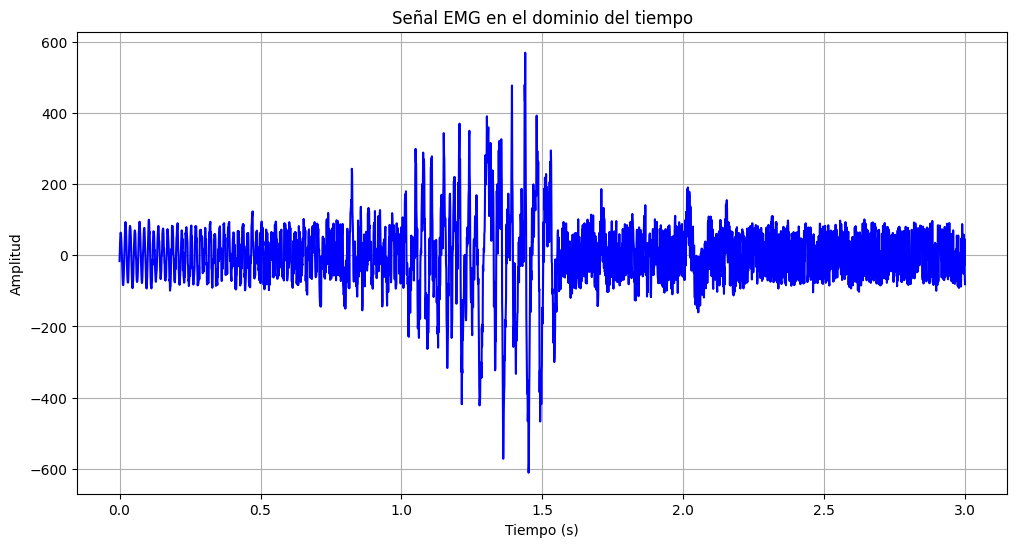

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Se carga la señal EMG
emg_signal = np.load('EMG_raw.npy')

# Parámetros
sampling_rate = 1000  # Frecuencia de muestreo en Hz
time = np.arange(len(emg_signal)) / sampling_rate  # Vector de tiempo

# Grafica de la señal EMG en el dominio del tiempo
plt.figure(figsize=(12, 6))
plt.plot(time, emg_signal, color='blue')
plt.title("Señal EMG en el dominio del tiempo")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid(True)
plt.show()



#### La gráfica muestra los cambios de amplitud en un registro electromiográfico cuando el músculo se encuentra en reposo y cuando se encuentra en una contracción muscular (se evidencia en las amplitudes de mayor intensidad)

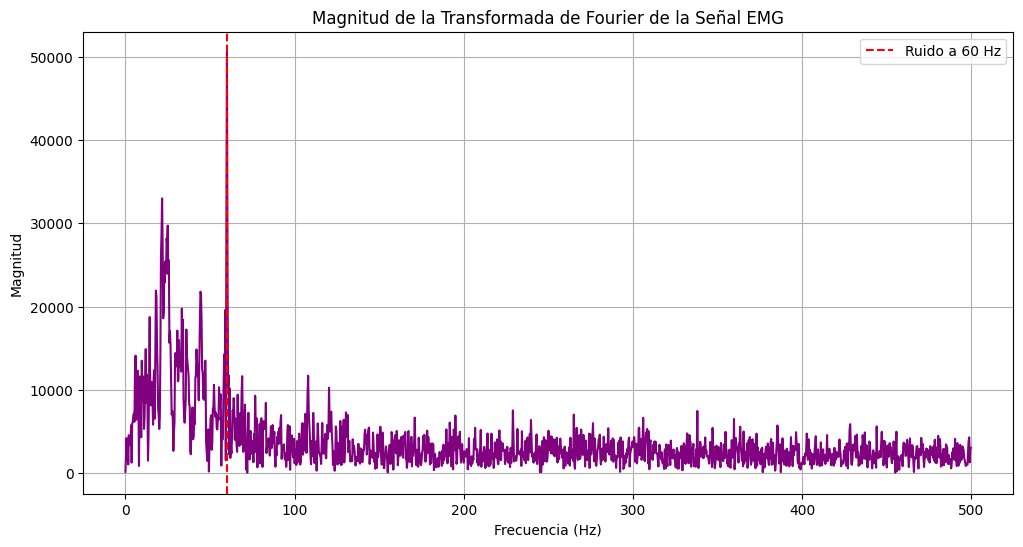

In [12]:
# Transformada de Fourier de la señal
frequencies = np.fft.fftfreq(len(emg_signal), 1 / sampling_rate)
emg_fft = np.fft.fft(emg_signal)
magnitude_spectrum = np.abs(emg_fft)

# Grafica de la magnitud de la respuesta en frecuencia
plt.figure(figsize=(12, 6))
plt.plot(frequencies[:len(frequencies)//2], magnitude_spectrum[:len(frequencies)//2], color='purple')
plt.axvline(x=60, color='red', linestyle='--', label='Ruido a 60 Hz')
plt.title("Magnitud de la Transformada de Fourier de la Señal EMG")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud")
plt.legend()
plt.grid(True)
plt.show()


#### La componente de ruido es notoria en la frecuencia 60 Hz, esto se muestra en la lina vertical punteada de rojo. 

### b) Diseñar un filtro FIR utilizando el método de ventanas con una ventana de Hamming, con frecuencia de corte de 50 Hz y 33 coeficientes. Graficar la respuesta impulsiva, su magnitud y fase de la respuesta en frecuencia para ambas ventanas, comparándolas con la respuesta ideal

C:\Users\HP\AppData\Local\Temp\ipykernel_17128\3891073441.py:13: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(fir_coefficients, basefmt=" ", use_line_collection=True)


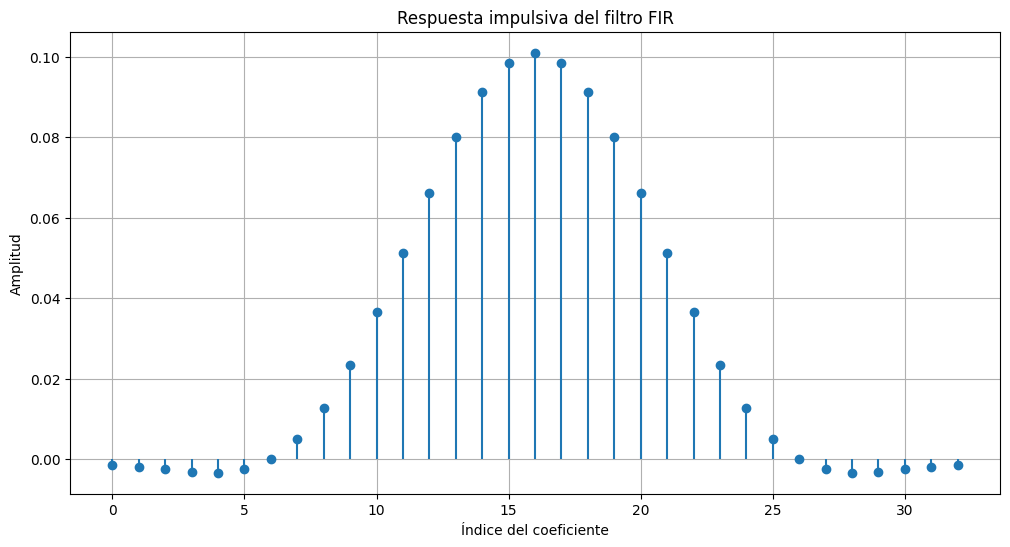

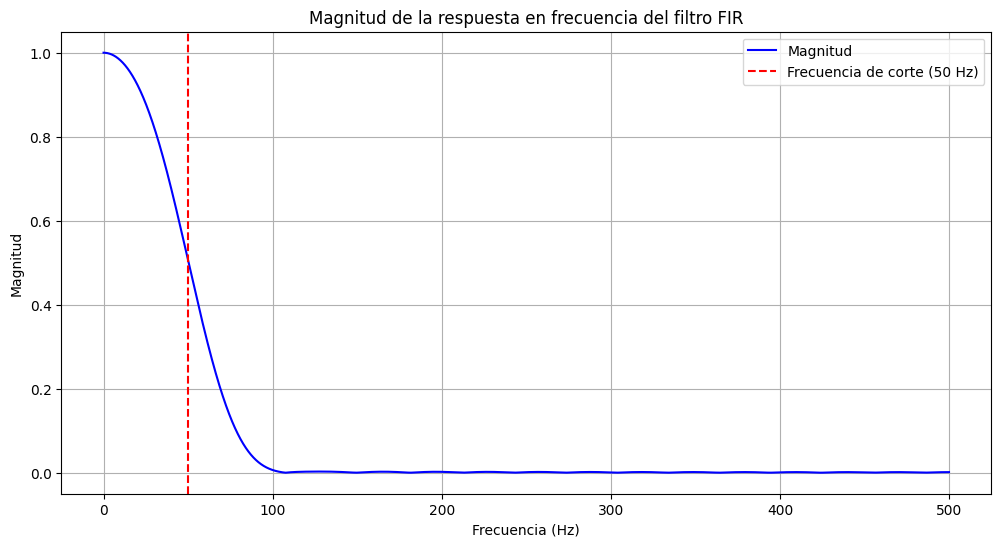

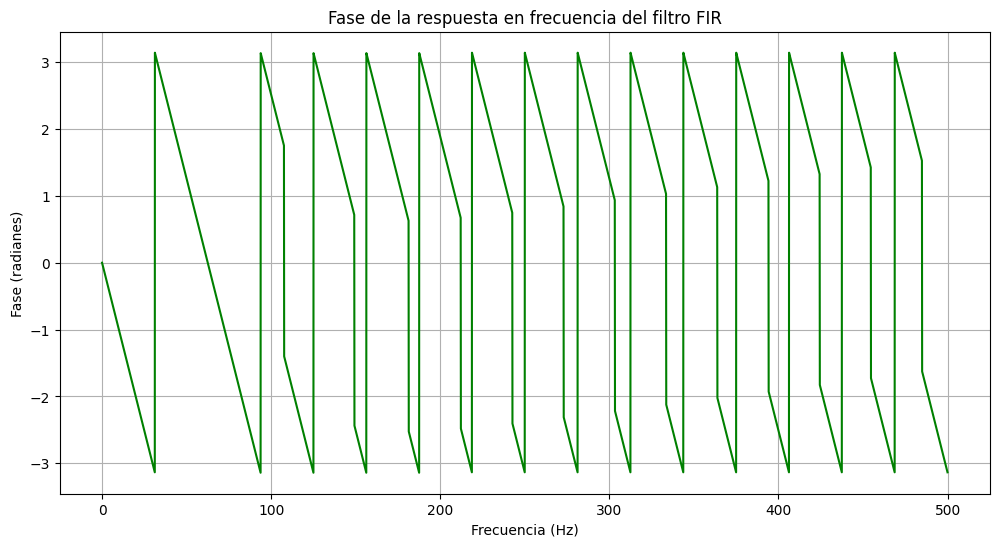

In [17]:
from scipy.signal import firwin, freqz

# Diseño del filtro FIR con ventana de Hamming
num_taps = 33 # Número de coeficientes
cutoff_frequency = 50  # Frecuencia de corte en Hz
fir_coefficients = firwin(num_taps, cutoff=cutoff_frequency, fs=sampling_rate, window="hamming")

# Respuesta en frecuencia del filtro
w, h = freqz(fir_coefficients, worN=8000, fs=sampling_rate)

# Grafica de la respuesta impulsiva del filtro
plt.figure(figsize=(12, 6))
plt.stem(fir_coefficients, basefmt=" ", use_line_collection=True)
plt.title("Respuesta impulsiva del filtro FIR")
plt.xlabel("Índice del coeficiente")
plt.ylabel("Amplitud")
plt.grid(True)
plt.show()

# Grafica de la magnitud y fase de la respuesta en frecuencia del filtro
plt.figure(figsize=(12, 6))
plt.plot(w, np.abs(h), color='blue', label="Magnitud")
plt.axvline(x=cutoff_frequency, color='red', linestyle='--', label='Frecuencia de corte (50 Hz)')
plt.title("Magnitud de la respuesta en frecuencia del filtro FIR")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(w, np.angle(h), color='green')
plt.title("Fase de la respuesta en frecuencia del filtro FIR")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Fase (radianes)")
plt.grid(True)
plt.show()


#### Notamos que la respuesta impulsiva del filtro FIR no se asemeja del todo a su respuesta ideal en frecuencia. Esto se debe a la cantidad de coeficientes del filtro, pues si se considerara más coeficientes el parecido entre el filtro FIR y el ideal sería más notorio. Esto lo podeoms ver si probamos una cantidad de coeficientes de 1000 por ejemplo:

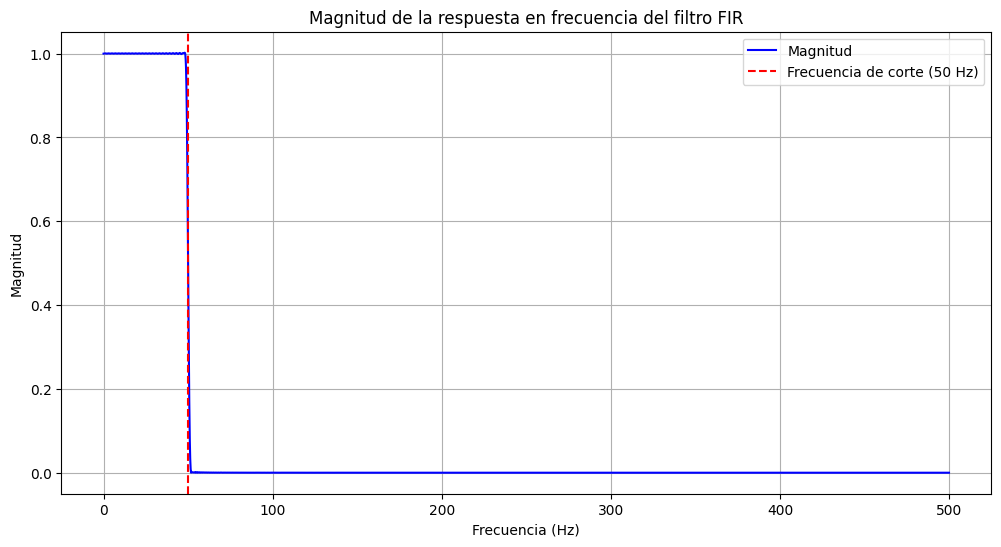

In [18]:
num_taps = 1000 # Número de coeficientes
cutoff_frequency = 50  # Frecuencia de corte en Hz
fir_coefficients = firwin(num_taps, cutoff=cutoff_frequency, fs=sampling_rate, window="hamming")

# Respuesta en frecuencia del filtro
w, h = freqz(fir_coefficients, worN=8000, fs=sampling_rate)

# Grafica de la magnitud y fase de la respuesta en frecuencia del filtro
plt.figure(figsize=(12, 6))
plt.plot(w, np.abs(h), color='blue', label="Magnitud")
plt.axvline(x=cutoff_frequency, color='red', linestyle='--', label='Frecuencia de corte (50 Hz)')
plt.title("Magnitud de la respuesta en frecuencia del filtro FIR")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud")
plt.legend()
plt.grid(True)
plt.show()

#### c) Diseñar un filtro FIR utilizando el método de mínimos cuadrados con 45 muestras en frecuencia, 33 coeficientes y frecuencia de corte de 50 Hz. Graficar la magnitud y fase de la respuesta en frecuencia, comparándola con la respuesta ideal

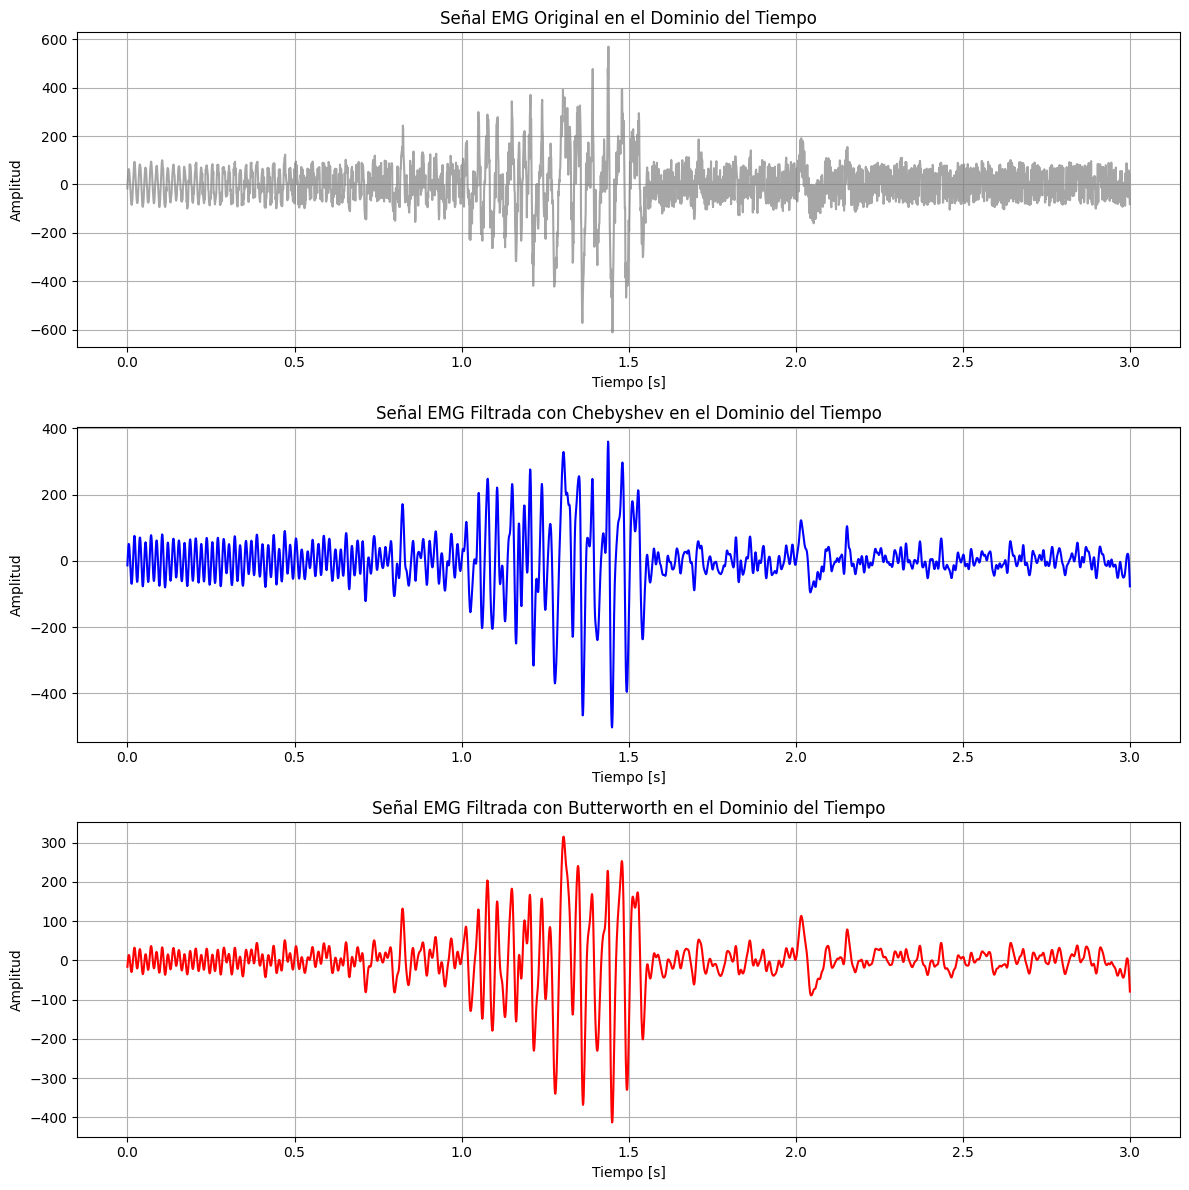

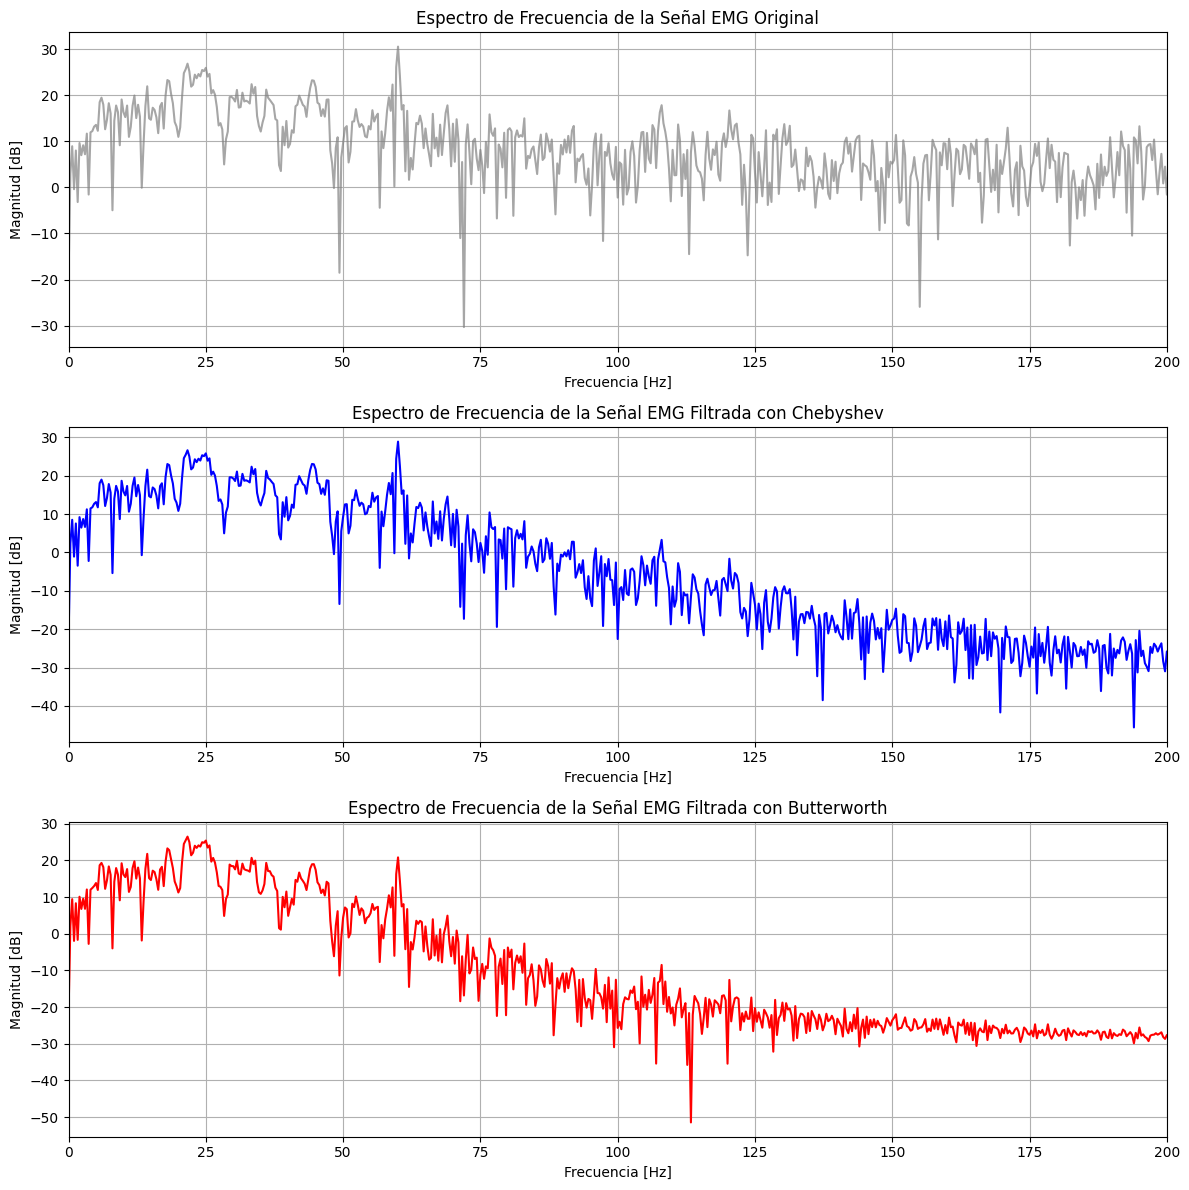

SNR para el filtro Chebyshev: 4.58 dB
SNR para el filtro Butterworth: 1.46 dB


#### d) Diseñar un filtro FIR utilizando el método de muestreo en frecuencia, con frecuencia de corte de 50 Hz, y 33 coeficientes. Graficar la magnitud y fase de la respuesta en frecuencia, y compararlas con la respuesta ideal

In [12]:
from scipy.fft import ifft

# Parte d: Diseño del filtro FIR utilizando el método de muestreo en frecuencia
# Frecuencia de corte y número de coeficientes
cutoff_freq = 50  # Frecuencia de corte en Hz
num_taps = 33  # Número de coeficientes del filtro

# Calcular la respuesta ideal en frecuencia para un filtro paso bajo
# 1 en la banda de paso (frecuencias menores a 50 Hz) y 0 en la banda de rechazo
freq_response = np.zeros(1024)  # Utilizamos un vector grande para obtener una buena resolución de frecuencia
cutoff_idx = int(cutoff_freq / sampling_rate * len(freq_response) * 2)  # Índice en frecuencia de corte
freq_response[:cutoff_idx] = 1  # Paso bajo hasta 50 Hz
freq_response[-cutoff_idx:] = 1  # Simetría para la parte negativa de la frecuencia

# Obtener la respuesta impulsiva aplicando la transformada inversa de Fourier
impulse_response = np.real(ifft(freq_response))  # Tomamos la parte real
fir_freq_sampled = impulse_response[:num_taps]  # Tomamos los primeros 33 coeficientes

# Calcular la respuesta en frecuencia del filtro de muestreo en frecuencia
w_fs, h_fs = freqz(fir_freq_sampled, worN=8000, fs=sampling_rate)

# Graficar la magnitud de la respuesta en frecuencia del filtro de muestreo en frecuencia
plt.figure(figsize=(12, 6))
plt.plot(w_fs, np.abs(h_fs), color='blue', label="Magnitud (Filtro Muestreo en Frecuencia)")
plt.axvline(x=cutoff_freq, color='red', linestyle='--', label='Frecuencia de corte (50 Hz)')
plt.title("Magnitud de la respuesta en frecuencia del filtro FIR (Muestreo en Frecuencia)")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud")
plt.legend()
plt.grid(True)
plt.show()

# Graficar la fase de la respuesta en frecuencia del filtro de muestreo en frecuencia
plt.figure(figsize=(12, 6))
plt.plot(w_fs, np.angle(h_fs), color='green')
plt.title("Fase de la respuesta en frecuencia del filtro FIR (Muestreo en Frecuencia)")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Fase (radianes)")
plt.grid(True)
plt.show()


NameError: name 'freqz' is not defined

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter, freqz

# Aplicar cada uno de los filtros a la señal EMG utilizando la función lfilter
# Asegúrate de cargar `emg_signal` como la señal original

# Filtro con ventana de Hamming
filtered_signal_hamming = lfilter(fir_hamming, 1, emg_signal)

# Filtro con mínimos cuadrados
filtered_signal_ls = lfilter(fir_ls_coefficients, 1, emg_signal)

# Filtro con muestreo en frecuencia
filtered_signal_freq_sampling = lfilter(fir_freq_sampled, 1, emg_signal)

# Calcular las transformadas de Fourier de las señales filtradas
freqs, emg_fft = freqz(emg_signal, worN=8000, fs=sampling_rate)
_, hamming_fft = freqz(filtered_signal_hamming, worN=8000, fs=sampling_rate)
_, ls_fft = freqz(filtered_signal_ls, worN=8000, fs=sampling_rate)
_, fs_fft = freqz(filtered_signal_freq_sampling, worN=8000, fs=sampling_rate)

# Graficar las señales filtradas en el dominio del tiempo
plt.figure(figsize=(12, 8))
plt.plot(emg_signal, color='gray', alpha=0.6, label='Señal EMG Original')
plt.plot(filtered_signal_hamming, color='blue', label='Señal Filtrada (Hamming)')
plt.plot(filtered_signal_ls, color='orange', label='Señal Filtrada (Mínimos Cuadrados)')
plt.plot(filtered_signal_freq_sampling, color='green', label='Señal Filtrada (Muestreo en Frecuencia)')
plt.title("Señales Filtradas en el Dominio del Tiempo")
plt.xlabel("Muestras")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.show()

# Graficar las magnitudes de las respuestas en frecuencia
plt.figure(figsize=(12, 8))
plt.plot(freqs, np.abs(emg_fft), color='gray', label='Original')
plt.plot(freqs, np.abs(hamming_fft), color='blue', label='Hamming')
plt.plot(freqs, np.abs(ls_fft), color='orange', label='Mínimos Cuadrados')
plt.plot(freqs, np.abs(fs_fft), color='green', label='Muestreo en Frecuencia')
plt.title("Magnitud de la Respuesta en Frecuencia de las Señales Filtradas")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud")
plt.legend()
plt.grid(True)
plt.show()


NameError: name 'fir_hamming' is not defined

## PREGUNTA 2

#### a)  Diseñar un filtro Chebyshev tipo I de orden 2 utilizando el método de invariancia al impulso, con frecuencia de corte de 50 Hz. Graficar la magnitud y la fase de la respuesta en frecuencia del filtro

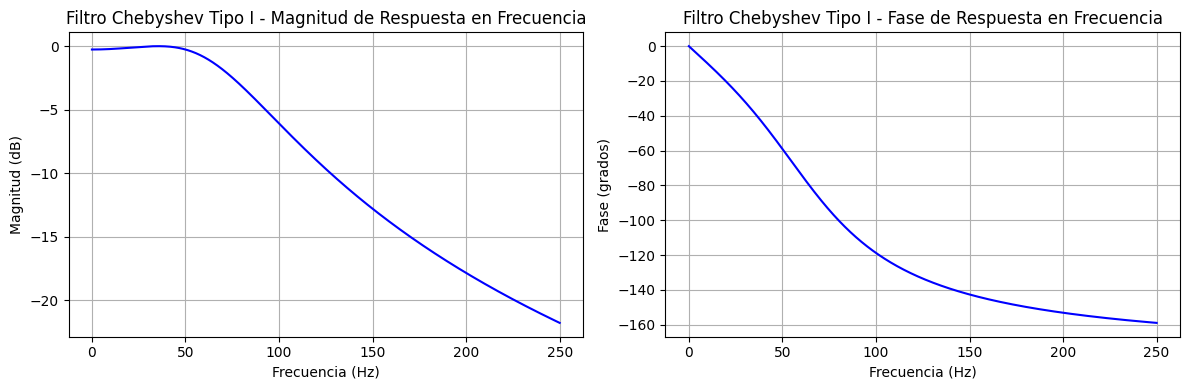

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Parámetros del filtro Chebyshev tipo I
fs = 500  # frecuencia de muestreo (Hz)
fc = 50   # frecuencia de corte (Hz)
order = 2 # orden del filtro
epsilon = 0.25  # factor de ripple en la banda pasante

# Convertimos la frecuencia de corte a radianes
omg_c = 2 * np.pi * fc / fs

# Polos del filtro Chebyshev
a = np.zeros(order + 1)
a[order] = 1
Tn = np.polynomial.chebyshev.Chebyshev(a)
Tn2 = 1 + epsilon**2 * (Tn * Tn)

# Seleccionamos los polos en el lado izquierdo del plano-s (Re{s_k} < 0)
roots = np.polynomial.chebyshev.Chebyshev.roots(Tn2)
s_roots = np.sort_complex(roots * 1j * omg_c)

# Calculamos coeficientes de la expansión en fracciones parciales
ck = np.ones(order, dtype=complex) * omg_c / epsilon
for k in range(order):    
    for l in range(order):
        if k != l:
            ck[k] = ck[k] * (omg_c / 2) / (s_roots[k] - s_roots[l])

# Calculamos la respuesta en frecuencia
N = 1000
omg = np.linspace(0, np.pi, N)
Homg = 0
for k in range(order):    
    Homg += ck[k] / (1j * omg - s_roots[k])

# Graficamos la magnitud y la fase de la respuesta en frecuencia
fig = plt.figure(figsize=[12, 4])

# Magnitud en dB
plt.subplot(1, 2, 1)
plt.plot(omg * fs / (2 * np.pi), 20 * np.log10(np.abs(Homg)), 'b')
plt.title("Filtro Chebyshev Tipo I - Magnitud de Respuesta en Frecuencia")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud (dB)")
plt.grid('on')

# Fase
plt.subplot(1, 2, 2)
plt.plot(omg * fs / (2 * np.pi), np.unwrap(np.angle(Homg)) * 180 / np.pi, 'b')
plt.title("Filtro Chebyshev Tipo I - Fase de Respuesta en Frecuencia")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Fase (grados)")
plt.grid('on')

plt.tight_layout()
plt.show()


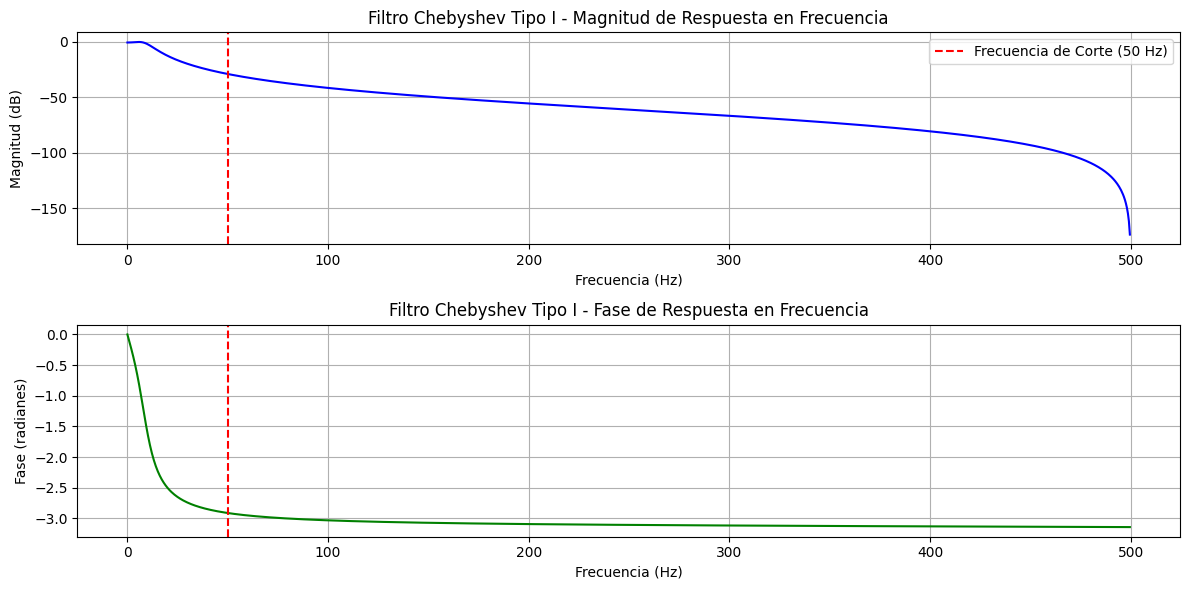

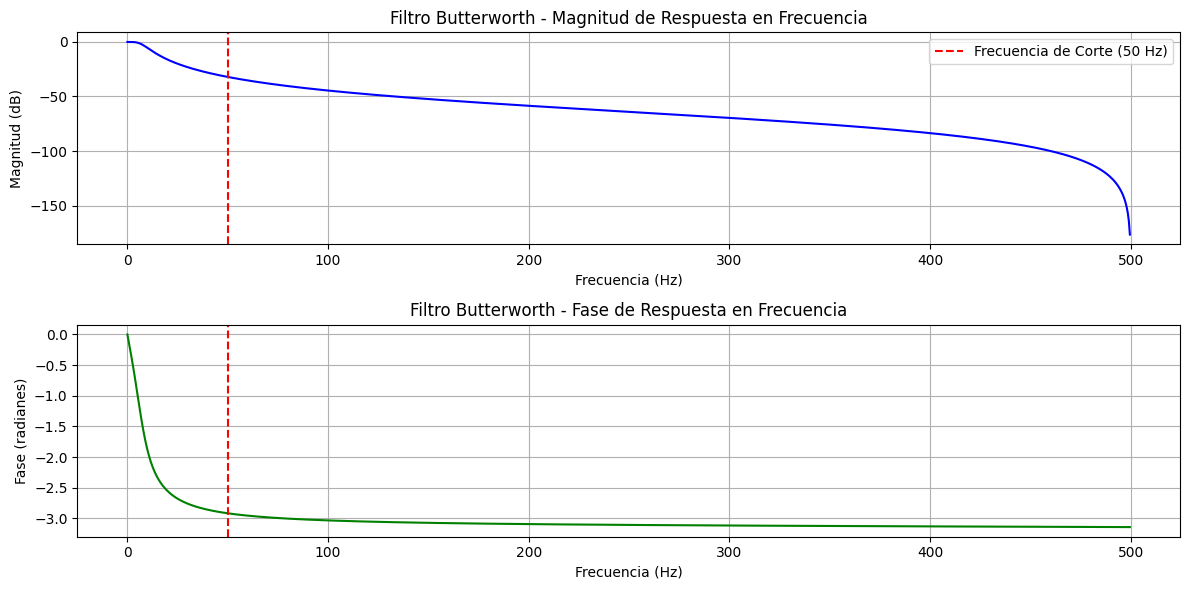

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import cheby1, butter, bilinear, freqz

# Parámetros
fs = 1000  # Frecuencia de muestreo (Hz)
fc = 50    # Frecuencia de corte (Hz)
order = 2  # Orden del filtro

# Inciso (a) - Filtro Chebyshev tipo I usando método de invariancia al impulso
# Diseño del filtro analógico Chebyshev
b_analog_cheby, a_analog_cheby = cheby1(order, 0.5, fc, btype='low', analog=True)

# Conversión a digital usando invariancia al impulso
b_cheby, a_cheby = bilinear(b_analog_cheby, a_analog_cheby, fs=fs)

# Calcular respuesta en frecuencia del filtro Chebyshev digital
frecs_cheby, respuesta_cheby = freqz(b_cheby, a_cheby, worN=1024, fs=fs)

# Graficar la magnitud y fase de la respuesta en frecuencia del filtro Chebyshev
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(frecs_cheby, 20 * np.log10(np.abs(respuesta_cheby)), 'b')
plt.title("Filtro Chebyshev Tipo I - Magnitud de Respuesta en Frecuencia")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud (dB)")
plt.axvline(fc, color="red", linestyle="--", label="Frecuencia de Corte (50 Hz)")
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(frecs_cheby, np.angle(respuesta_cheby), 'g')
plt.title("Filtro Chebyshev Tipo I - Fase de Respuesta en Frecuencia")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Fase (radianes)")
plt.axvline(fc, color="red", linestyle="--")
plt.grid(True)

plt.tight_layout()
plt.show()

# Inciso (b) - Filtro Butterworth usando la transformación bilineal
# Diseño del filtro analógico Butterworth
b_analog_butter, a_analog_butter = butter(order, fc, btype='low', analog=True)

# Conversión a digital usando la transformación bilineal
b_butter, a_butter = bilinear(b_analog_butter, a_analog_butter, fs=fs)

# Calcular respuesta en frecuencia del filtro Butterworth digital
frecs_butter, respuesta_butter = freqz(b_butter, a_butter, worN=1024, fs=fs)

# Graficar la magnitud y fase de la respuesta en frecuencia del filtro Butterworth
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(frecs_butter, 20 * np.log10(np.abs(respuesta_butter)), 'b')
plt.title("Filtro Butterworth - Magnitud de Respuesta en Frecuencia")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud (dB)")
plt.axvline(fc, color="red", linestyle="--", label="Frecuencia de Corte (50 Hz)")
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(frecs_butter, np.angle(respuesta_butter), 'g')
plt.title("Filtro Butterworth - Fase de Respuesta en Frecuencia")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Fase (radianes)")
plt.axvline(fc, color="red", linestyle="--")
plt.grid(True)

plt.tight_layout()
plt.show()

#### b) Diseñar un filtro Butterworth de orden 2 utilizando la transformación bilineal y frecuencia de corte de 50 Hz. Graficar la magnitud y la fase de la respuesta en frecuencia del filtro.

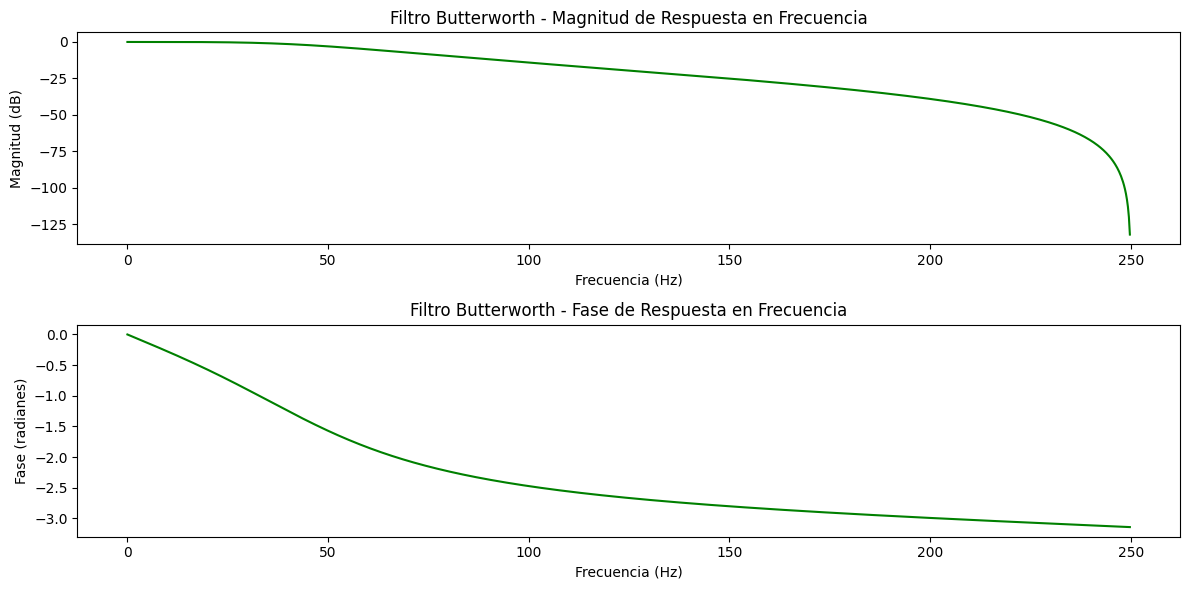

In [3]:
# b) Filtro Butterworth usando la transformación bilineal
b_butter, a_butter = signal.butter(order, fc, 'low', fs=fs)

# Cálculo de la respuesta en frecuencia
w, h_butter = signal.freqz(b_butter, a_butter, worN=1024, fs=fs)

# Gráfico de la magnitud y fase del filtro Butterworth
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(w, 20 * np.log10(abs(h_butter)), 'g')
plt.title("Filtro Butterworth - Magnitud de Respuesta en Frecuencia")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud (dB)")

plt.subplot(2, 1, 2)
plt.plot(w, np.angle(h_butter), 'g')
plt.title("Filtro Butterworth - Fase de Respuesta en Frecuencia")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Fase (radianes)")
plt.tight_layout()
plt.show()

#### c) Aplicar ambos filtros (Chebyshev y Butterworth) a la señal EMG y graficar las señales filtradas en el dominio del tiempo y las magnitudes de sus respectivas respuestas en el dominio de la frecuencia comparándolas con la magnitud de la respuesta en frecuencia de la señal original.

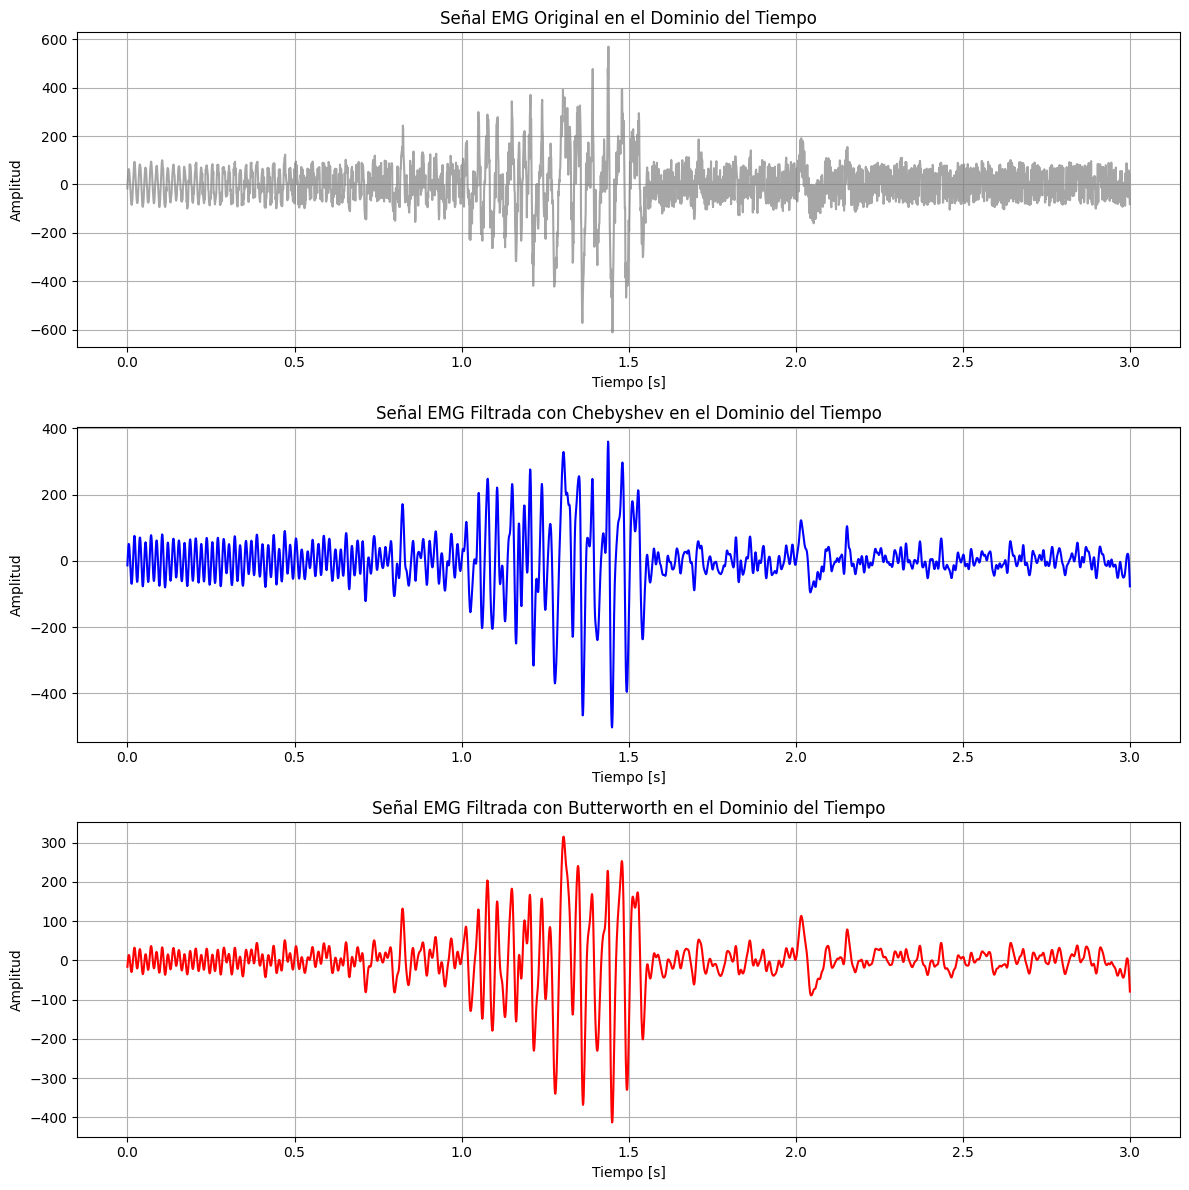

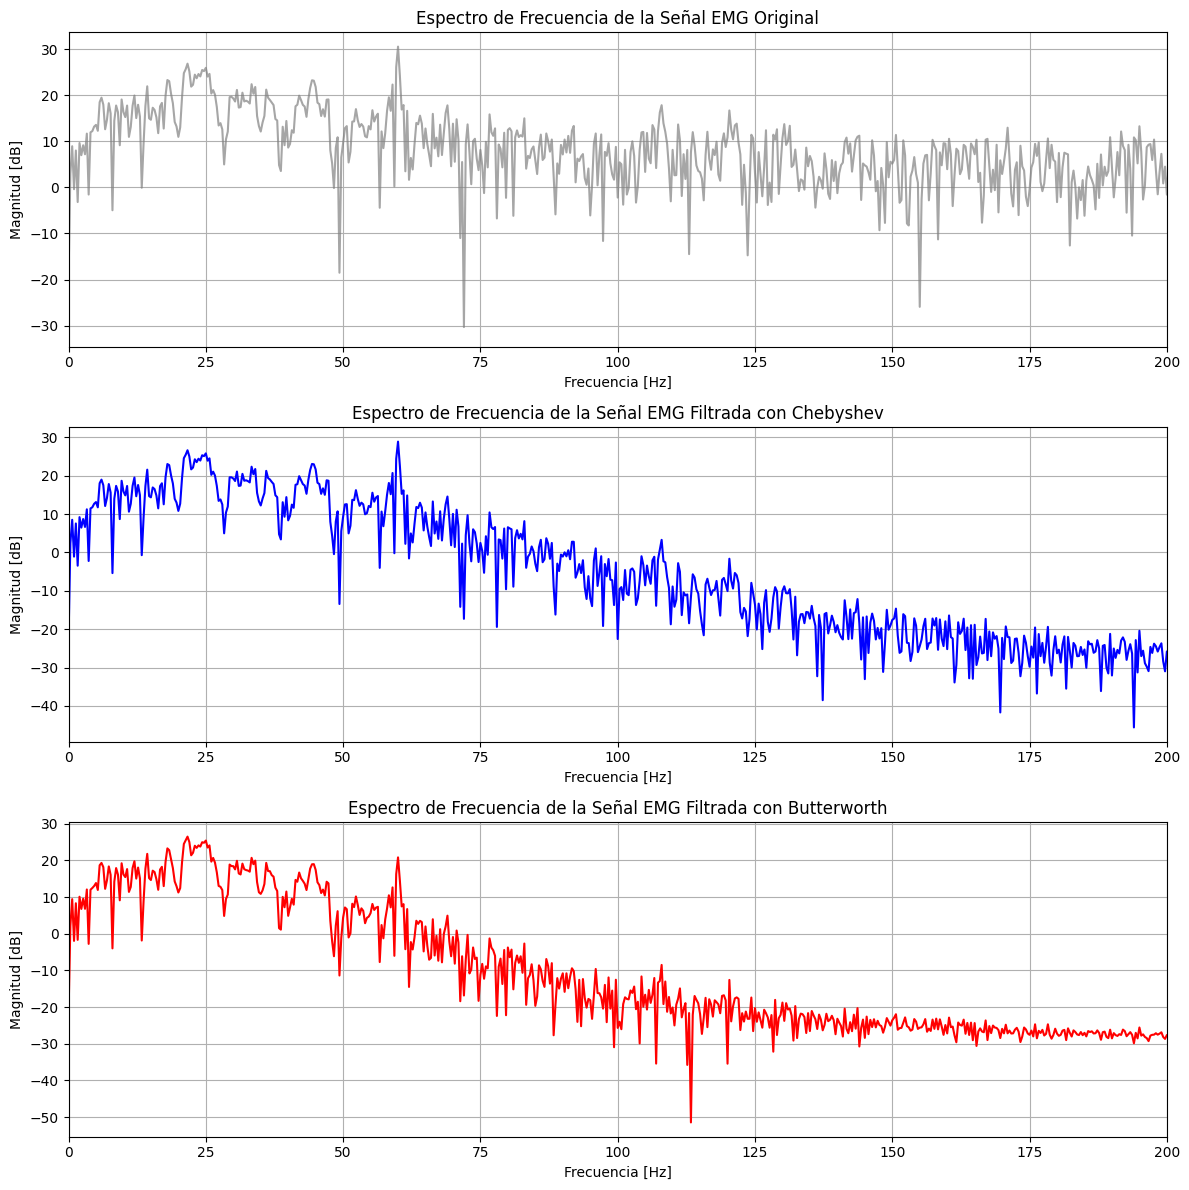

SNR para el filtro Chebyshev: 4.58 dB
SNR para el filtro Butterworth: 1.46 dB


In [36]:
from scipy import signal

# Cargar la señal EMG
raw_emg_signal = np.load('EMG_raw.npy')

# Parámetros comunes
sampling_rate = 1000  # Frecuencia de muestreo en Hz
cutoff_freq = 50      # Frecuencia de corte en Hz
filter_order = 2      # Orden de los filtros
normalized_cutoff = cutoff_freq / (sampling_rate / 2)  # Frecuencia de corte normalizada

# Diseño del filtro Chebyshev tipo I
cheby_ripple = 0.25  # Rizado en dB
cheby_b, cheby_a = signal.cheby1(filter_order, cheby_ripple, normalized_cutoff, btype='low', analog=False)

# Diseño del filtro Butterworth
butter_b, butter_a = signal.butter(filter_order, normalized_cutoff, btype='low', analog=False)

# Aplicar los filtros a la señal EMG
filtered_emg_cheby = signal.filtfilt(cheby_b, cheby_a, raw_emg_signal)
filtered_emg_butter = signal.filtfilt(butter_b, butter_a, raw_emg_signal)

# Cálculo de las FFTs
def compute_spectrum(signal_data, sampling_rate):
    num_samples = len(signal_data)
    freq_axis = np.fft.fftfreq(num_samples, 1/sampling_rate)[:num_samples//2]
    spectrum = 2 / num_samples * np.abs(np.fft.fft(signal_data))[:num_samples//2]
    return freq_axis, spectrum

freqs, fft_raw = compute_spectrum(raw_emg_signal, sampling_rate)
_, fft_cheby = compute_spectrum(filtered_emg_cheby, sampling_rate)
_, fft_butter = compute_spectrum(filtered_emg_butter, sampling_rate)

# Crear subplots para cada señal en el dominio del tiempo
time_axis = np.arange(len(raw_emg_signal)) / sampling_rate

fig, (ax_raw_time, ax_cheby_time, ax_butter_time) = plt.subplots(3, 1, figsize=(12, 12))

# Señal original en el dominio del tiempo
ax_raw_time.plot(time_axis, raw_emg_signal, 'gray', alpha=0.7)
ax_raw_time.set_xlabel('Tiempo [s]')
ax_raw_time.set_ylabel('Amplitud')
ax_raw_time.set_title('Señal EMG Original en el Dominio del Tiempo')
ax_raw_time.grid(True)

# Señal filtrada con Chebyshev en el dominio del tiempo
ax_cheby_time.plot(time_axis, filtered_emg_cheby, 'b')
ax_cheby_time.set_xlabel('Tiempo [s]')
ax_cheby_time.set_ylabel('Amplitud')
ax_cheby_time.set_title('Señal EMG Filtrada con Chebyshev en el Dominio del Tiempo')
ax_cheby_time.grid(True)

# Señal filtrada con Butterworth en el dominio del tiempo
ax_butter_time.plot(time_axis, filtered_emg_butter, 'r')
ax_butter_time.set_xlabel('Tiempo [s]')
ax_butter_time.set_ylabel('Amplitud')
ax_butter_time.set_title('Señal EMG Filtrada con Butterworth en el Dominio del Tiempo')
ax_butter_time.grid(True)

plt.tight_layout()
plt.show()

# Crear subplots para cada respuesta en frecuencia
fig, (ax_raw_freq, ax_cheby_freq, ax_butter_freq) = plt.subplots(3, 1, figsize=(12, 12))

# Espectro de la señal original
ax_raw_freq.plot(freqs, 20 * np.log10(fft_raw), 'gray', alpha=0.7)
ax_raw_freq.set_xlabel('Frecuencia [Hz]')
ax_raw_freq.set_ylabel('Magnitud [dB]')
ax_raw_freq.set_title('Espectro de Frecuencia de la Señal EMG Original')
ax_raw_freq.set_xlim([0, 200])
ax_raw_freq.grid(True)

# Espectro de la señal filtrada con Chebyshev
ax_cheby_freq.plot(freqs, 20 * np.log10(fft_cheby), 'b')
ax_cheby_freq.set_xlabel('Frecuencia [Hz]')
ax_cheby_freq.set_ylabel('Magnitud [dB]')
ax_cheby_freq.set_title('Espectro de Frecuencia de la Señal EMG Filtrada con Chebyshev')
ax_cheby_freq.set_xlim([0, 200])
ax_cheby_freq.grid(True)

# Espectro de la señal filtrada con Butterworth
ax_butter_freq.plot(freqs, 20 * np.log10(fft_butter), 'r')
ax_butter_freq.set_xlabel('Frecuencia [Hz]')
ax_butter_freq.set_ylabel('Magnitud [dB]')
ax_butter_freq.set_title('Espectro de Frecuencia de la Señal EMG Filtrada con Butterworth')
ax_butter_freq.set_xlim([0, 200])
ax_butter_freq.grid(True)

plt.tight_layout()
plt.show()

# Calcular SNR para cada filtro
def compute_snr(filtered_signal, original_signal):
    noise_component = original_signal - filtered_signal
    snr_value = 10 * np.log10(np.sum(filtered_signal**2) / np.sum(noise_component**2))
    return snr_value

snr_cheby = compute_snr(filtered_emg_cheby, raw_emg_signal)
snr_butter = compute_snr(filtered_emg_butter, raw_emg_signal)

print(f"SNR para el filtro Chebyshev: {snr_cheby:.2f} dB")
print(f"SNR para el filtro Butterworth: {snr_butter:.2f} dB")



## PREGUNTA 3

#### a) Graficar las señales filtradas utilizando el filtro FIR de Hamming y el filtro Butterworth entre 1 y 2.5 segundos de la señal EMG, comparándolas en el dominio del tiempo. Mencionar las diferencias observadas

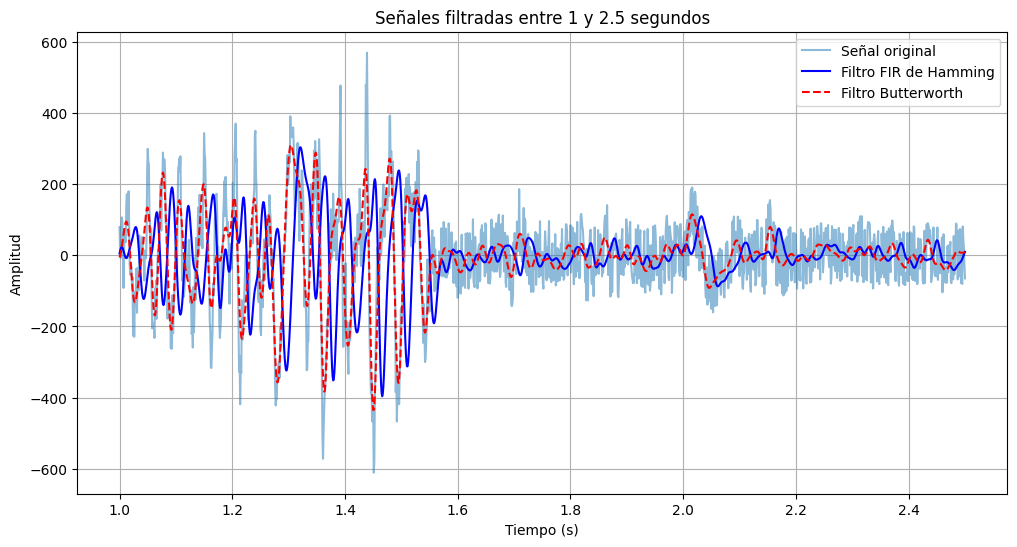

In [35]:

from scipy.signal import butter, filtfilt, firwin, lfilter

# Cargar la señal EMG
emg_signal = np.load('EMG_raw.npy')

# Parámetros de la señal y filtros
sampling_rate = 1000  # Frecuencia de muestreo en Hz
fc = 50               # Frecuencia de corte en Hz

# Crear filtros FIR de Hamming e IIR Butterworth
fir_hamming = firwin(33, cutoff=fc, window="hamming", fs=sampling_rate)
b, a = butter(4, fc, fs=sampling_rate, btype='low')

# Aplicar los filtros FIR y Butterworth a la señal
fir_filtered = lfilter(fir_hamming, 1, emg_signal)
iir_filtered = filtfilt(b, a, emg_signal)  # Aplicación bidireccional del IIR para evitar desplazamiento de fase

# Seleccionar la parte de la señal entre 1 y 2.5 segundos
time = np.arange(len(emg_signal)) / sampling_rate
t_range = (time >= 1) & (time <= 2.5)

# Graficar las señales
plt.figure(figsize=(12, 6))
plt.plot(time[t_range], emg_signal[t_range], label="Señal original", alpha=0.5)
plt.plot(time[t_range], fir_filtered[t_range], label="Filtro FIR de Hamming", color="blue")
plt.plot(time[t_range], iir_filtered[t_range], label="Filtro Butterworth", color="red", linestyle="--")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.title("Señales filtradas entre 1 y 2.5 segundos")
plt.legend()
plt.grid()
plt.show()

#### b) Calcular y graficar el retardo de grupo del filtro FIR de Hamming (Sugerencia: Investigue el comando group_delay de scipy.signal) y del filtro IIR Butterworth

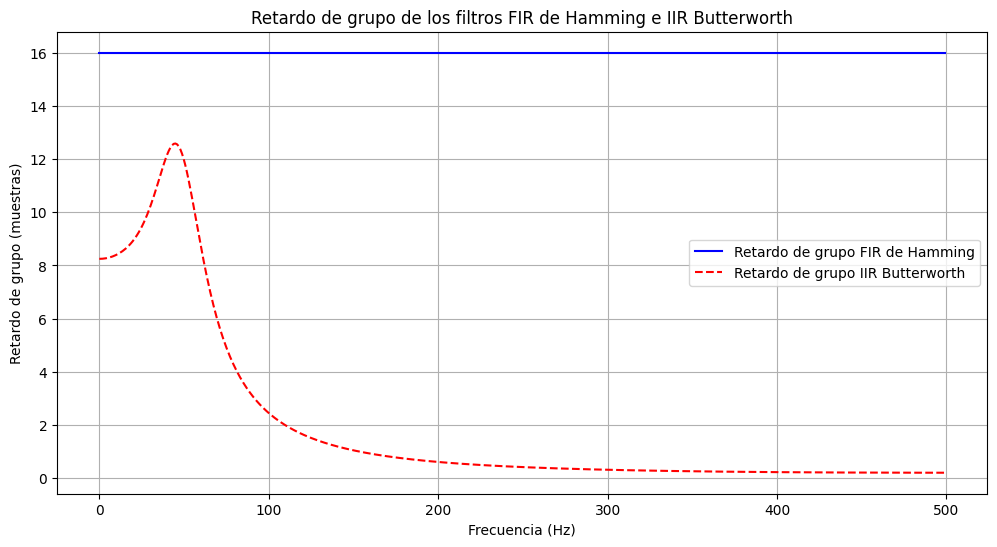

In [33]:
from scipy.signal import group_delay

# Calcular el retardo de grupo para el filtro FIR de Hamming y el IIR Butterworth
w_fir, gd_fir = group_delay((fir_hamming, 1), fs=sampling_rate)
w_iir, gd_iir = group_delay((b, a), fs=sampling_rate)

# Graficar el retardo de grupo
plt.figure(figsize=(12, 6))
plt.plot(w_fir, gd_fir, label="Retardo de grupo FIR de Hamming", color="blue")
plt.plot(w_iir, gd_iir, label="Retardo de grupo IIR Butterworth", color="red", linestyle="--")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Retardo de grupo (muestras)")
plt.title("Retardo de grupo de los filtros FIR de Hamming e IIR Butterworth")
plt.legend()
plt.grid()
plt.show()

#### c) Corregir la señal filtrada con el filtro FIR de Hamming aplicando el retardo de grupo calculado previamente. Graficar la señal filtrada original y la señal filtrada corregida en el dominio del tiempo, comparándolas entre 1 y 2.5 segundos respecto a la señal original

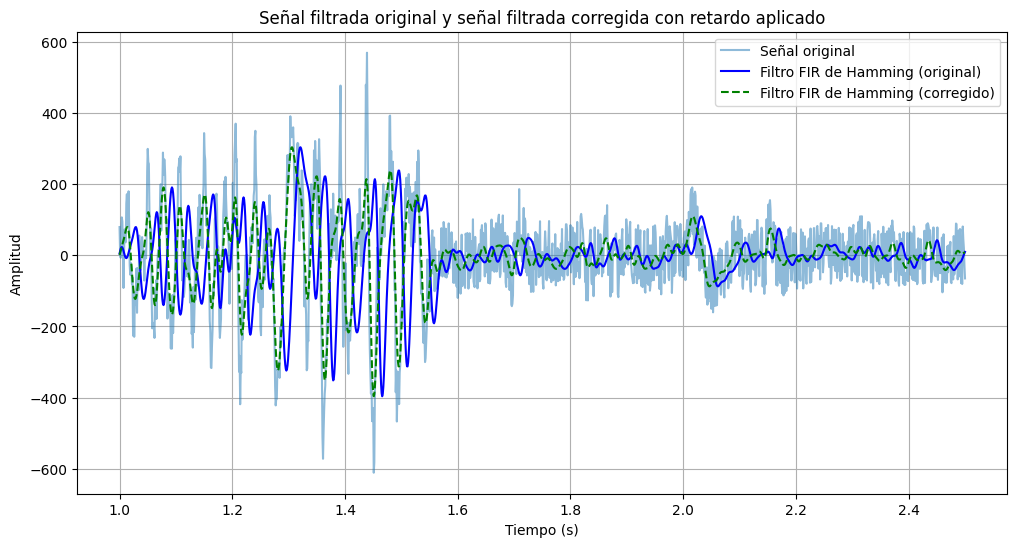

In [34]:
# Calcular el retardo promedio del filtro FIR de Hamming
retardo_fir = int(np.mean(gd_fir))

# Corregir la señal filtrada desplazándola
fir_corrected = np.roll(fir_filtered, -retardo_fir)

# Graficar la señal original, la señal filtrada original y la señal filtrada corregida
plt.figure(figsize=(12, 6))
plt.plot(time[t_range], emg_signal[t_range], label="Señal original", alpha=0.5)
plt.plot(time[t_range], fir_filtered[t_range], label="Filtro FIR de Hamming (original)", color="blue")
plt.plot(time[t_range], fir_corrected[t_range], label="Filtro FIR de Hamming (corregido)", color="green", linestyle="--")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.title("Señal filtrada original y señal filtrada corregida con retardo aplicado")
plt.legend()
plt.grid()
plt.show()